In [68]:
# import snappy
# from snappy import GPF
# from snappy import ProductIO

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import tensorflow as tf

import sys
sys.path.append('../')
import sis_helper as helper
from sis_helper import RGBProfile as rgb

# import importlib
# importlib.reload(helper)

TILESIZE = 256

if TILESIZE == 960:
    pass
    # TIF_FILENAME='/home/cb/sis/data/collocated/001_1018x8004.tif'
    # TENSOR_FILENAME='/home/cb/sis/data/tfrecords/001_6008x9002.tfrecord'
elif TILESIZE == 256:
    TIF_FILENAME='/home/cb/sis2/data/tif256/001_2622x8886.tif'
    TENSOR_FILENAME='/home/cb/sis2/data/tfrecords256/001_2622x8886.tfrecord'

TIF_FILENAME = '/home/cb/sis2/data/tif256/00020_3927x4710.tif'

In [69]:
raw_tiff = rasterio.open(os.path.join(TIF_FILENAME))


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


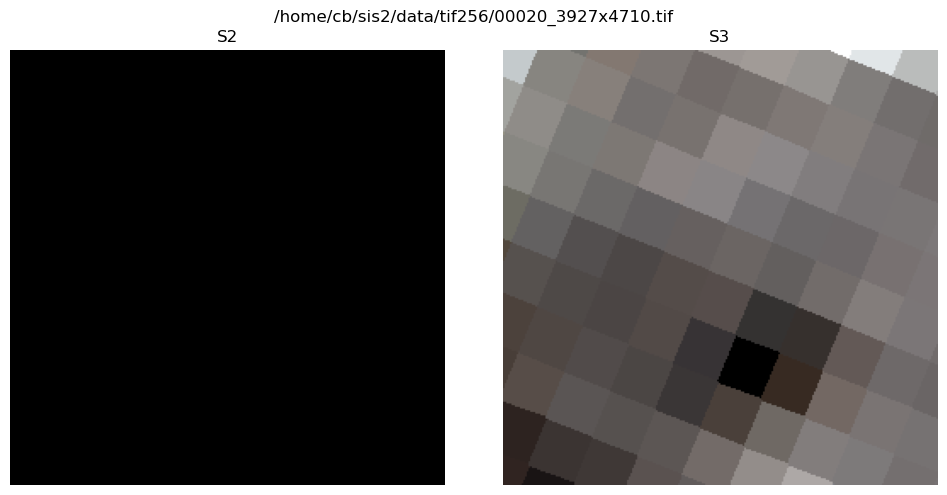

In [70]:
helper.plot_tiff_sbs(raw_tiff, title=TIF_FILENAME)


In [6]:
# Only uncomment if file should be produced
# helper.save_tfrecord(raw_tiff, TENSOR_FILENAME)


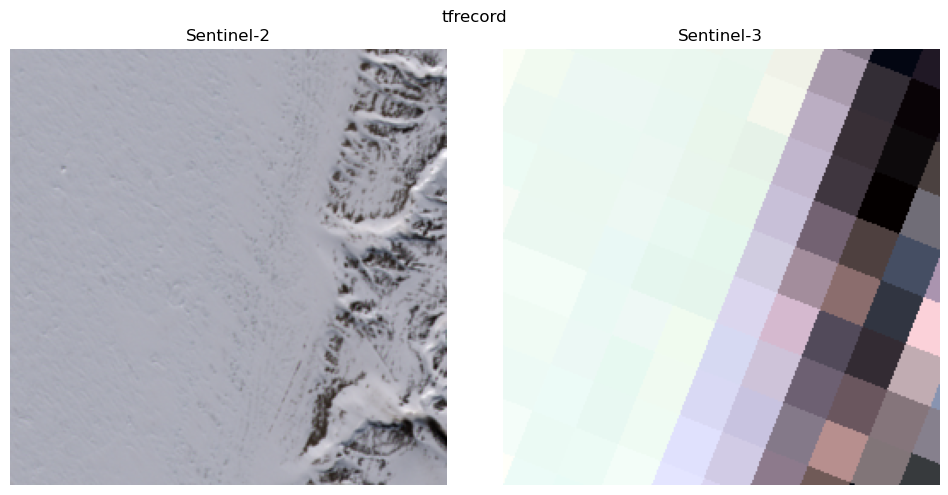

In [12]:
import importlib
importlib.reload(helper)

file_list = [TENSOR_FILENAME]

for sample_file in file_list:

    sample_dataset = tf.data.TFRecordDataset(sample_file)
    for element in sample_dataset:

        helper.plot_tensor_sbs(element, TILESIZE, title='tfrecord')


#### Additional tests

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


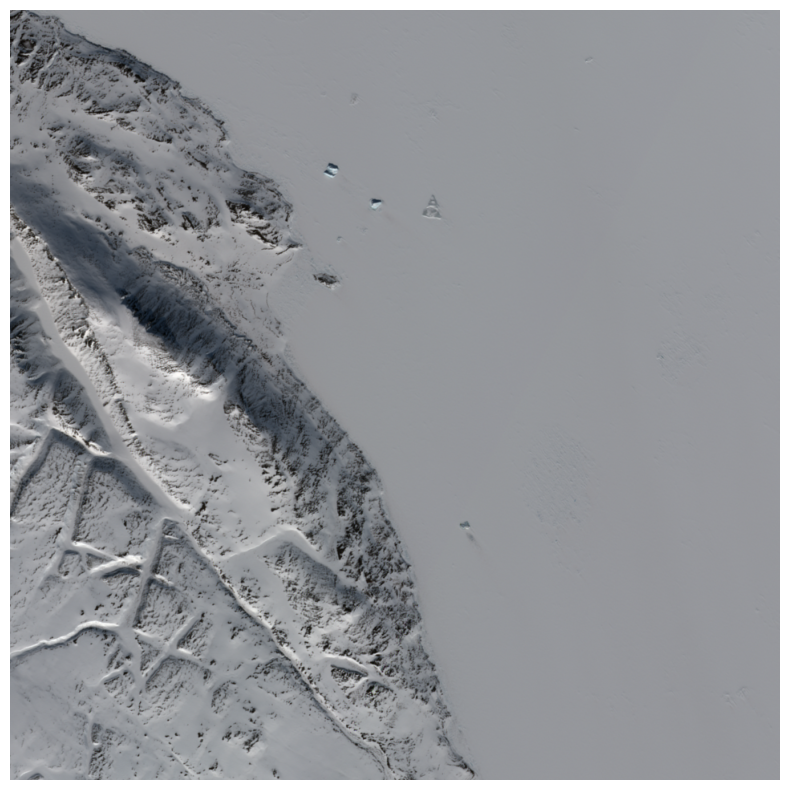

In [6]:
red_band = helper.normalize_numpy(raw_tiff.read(5))
green_band = helper.normalize_numpy(raw_tiff.read(4))
blue_band = helper.normalize_numpy(raw_tiff.read(3))

# Stack the bands to create the RGB image
# rgb_image = rasterio.plot.reshape_as_image([red_band, green_band, blue_band])
rgb_image = np.stack([red_band, green_band, blue_band], axis=-1)

# Display the RGB image
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()
